In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

In [2]:
# Load and preprocess the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [3]:
def plot_history(history, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

Epoch 1/10
391/391 [==============================] - 19s 47ms/step - loss: 0.5238 - accuracy: 0.7296 - val_loss: 0.4407 - val_accuracy: 0.8077
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 0.3658 - accuracy: 0.8406 - val_loss: 0.3770 - val_accuracy: 0.8370
Epoch 3/10
391/391 [==============================] - 19s 47ms/step - loss: 0.2291 - accuracy: 0.9104 - val_loss: 0.3923 - val_accuracy: 0.8492
Epoch 4/10
391/391 [==============================] - 19s 47ms/step - loss: 0.1348 - accuracy: 0.9522 - val_loss: 0.4322 - val_accuracy: 0.8386
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0839 - accuracy: 0.9715 - val_loss: 0.5399 - val_accuracy: 0.8191
Epoch 6/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0380 - accuracy: 0.9894 - val_loss: 0.6284 - val_accuracy: 0.8249
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0593 - accuracy: 0.9790 - val_loss: 0.6473 - val_accuracy:

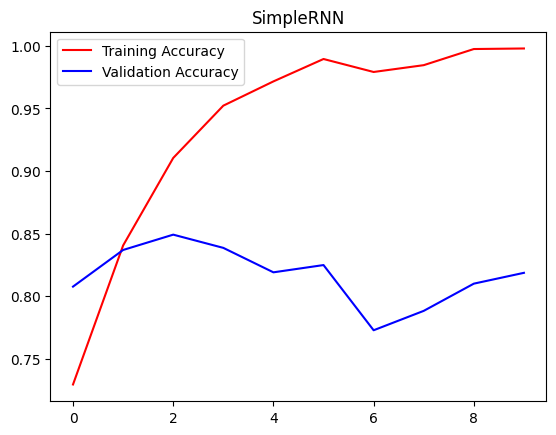

782/782 [==============================] - 5s 7ms/step - loss: 0.8135 - accuracy: 0.8187
SimpleRNN Accuracy: 81.87%


In [4]:
# Define and train SimpleRNN
model_srnn = Sequential()
model_srnn.add(Embedding(10000, 32, input_length=max_review_length))
model_srnn.add(SimpleRNN(32))
model_srnn.add(Dense(1, activation='sigmoid'))

model_srnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_srnn = model_srnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
plot_history(history_srnn, "SimpleRNN")
scores_srnn = model_srnn.evaluate(x_test, y_test)

print("SimpleRNN Accuracy: %.2f%%" % (scores_srnn[1] * 100))


Epoch 1/10
391/391 [==============================] - 45s 114ms/step - loss: 0.4342 - accuracy: 0.8007 - val_loss: 0.3373 - val_accuracy: 0.8614
Epoch 2/10
391/391 [==============================] - 43s 111ms/step - loss: 0.2477 - accuracy: 0.9055 - val_loss: 0.3366 - val_accuracy: 0.8552
Epoch 3/10
391/391 [==============================] - 45s 114ms/step - loss: 0.1967 - accuracy: 0.9272 - val_loss: 0.3187 - val_accuracy: 0.8715
Epoch 4/10
391/391 [==============================] - 44s 113ms/step - loss: 0.1537 - accuracy: 0.9458 - val_loss: 0.3431 - val_accuracy: 0.8603
Epoch 5/10
391/391 [==============================] - 44s 112ms/step - loss: 0.1279 - accuracy: 0.9552 - val_loss: 0.3775 - val_accuracy: 0.8616
Epoch 6/10
391/391 [==============================] - 45s 114ms/step - loss: 0.1023 - accuracy: 0.9648 - val_loss: 0.3887 - val_accuracy: 0.8645
Epoch 7/10
391/391 [==============================] - 45s 114ms/step - loss: 0.0826 - accuracy: 0.9724 - val_loss: 0.4222 - val_ac

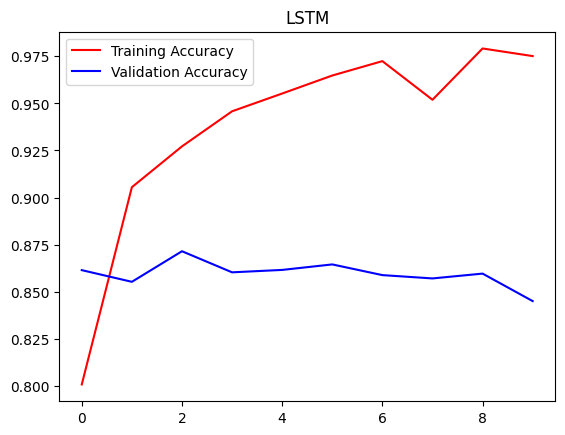

782/782 [==============================] - 12s 15ms/step - loss: 0.4439 - accuracy: 0.8450
LSTM Accuracy: 84.50%


In [5]:
# Define and train LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32, input_length=max_review_length))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
plot_history(history_lstm, "LSTM")
scores_lstm = model_lstm.evaluate(x_test, y_test)

print("LSTM Accuracy: %.2f%%" % (scores_lstm[1] * 100))

Epoch 1/10
391/391 [==============================] - 50s 125ms/step - loss: 0.4505 - accuracy: 0.7794 - val_loss: 0.3162 - val_accuracy: 0.8676
Epoch 2/10
391/391 [==============================] - 48s 124ms/step - loss: 0.2318 - accuracy: 0.9109 - val_loss: 0.3707 - val_accuracy: 0.8633
Epoch 3/10
391/391 [==============================] - 48s 124ms/step - loss: 0.1791 - accuracy: 0.9343 - val_loss: 0.3354 - val_accuracy: 0.8617
Epoch 4/10
391/391 [==============================] - 47s 120ms/step - loss: 0.1432 - accuracy: 0.9500 - val_loss: 0.3877 - val_accuracy: 0.8677
Epoch 5/10
391/391 [==============================] - 47s 121ms/step - loss: 0.1536 - accuracy: 0.9468 - val_loss: 0.3747 - val_accuracy: 0.8672
Epoch 6/10
391/391 [==============================] - 47s 121ms/step - loss: 0.1086 - accuracy: 0.9612 - val_loss: 0.3953 - val_accuracy: 0.8672
Epoch 7/10
391/391 [==============================] - 47s 120ms/step - loss: 0.0772 - accuracy: 0.9748 - val_loss: 0.4735 - val_ac

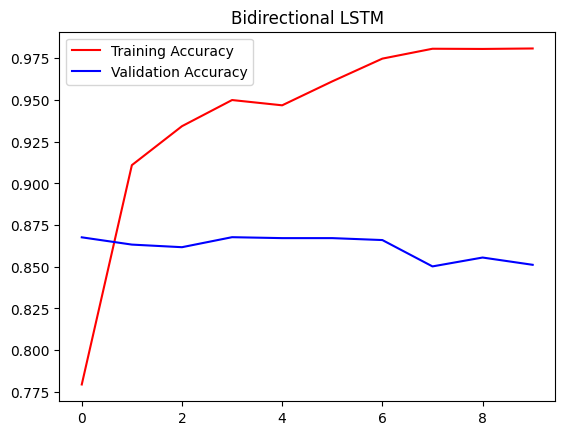

782/782 [==============================] - 13s 17ms/step - loss: 0.6191 - accuracy: 0.8512
Bidirectional LSTM Accuracy: 85.12%


In [6]:
# Define and train Bidirectional LSTM
model_bilstm = Sequential()
model_bilstm.add(Embedding(10000, 32, input_length=max_review_length))
model_bilstm.add(Bidirectional(LSTM(32)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
plot_history(history_bilstm, "Bidirectional LSTM")
scores_bilstm = model_bilstm.evaluate(x_test, y_test)

print("Bidirectional LSTM Accuracy: %.2f%%" % (scores_bilstm[1] * 100))


Epoch 1/10
391/391 [==============================] - 137s 346ms/step - loss: 0.3919 - accuracy: 0.8174 - val_loss: 0.3046 - val_accuracy: 0.8726
Epoch 2/10
391/391 [==============================] - 133s 340ms/step - loss: 0.2323 - accuracy: 0.9127 - val_loss: 0.6363 - val_accuracy: 0.8149
Epoch 3/10
391/391 [==============================] - 131s 335ms/step - loss: 0.2044 - accuracy: 0.9252 - val_loss: 0.3922 - val_accuracy: 0.8566
Epoch 4/10
391/391 [==============================] - 130s 333ms/step - loss: 0.1388 - accuracy: 0.9524 - val_loss: 0.3947 - val_accuracy: 0.8656
Epoch 5/10
391/391 [==============================] - 130s 334ms/step - loss: 0.0961 - accuracy: 0.9680 - val_loss: 0.5049 - val_accuracy: 0.8561
Epoch 6/10
391/391 [==============================] - 130s 333ms/step - loss: 0.0755 - accuracy: 0.9758 - val_loss: 0.5131 - val_accuracy: 0.8576
Epoch 7/10
391/391 [==============================] - 130s 333ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.5649 -

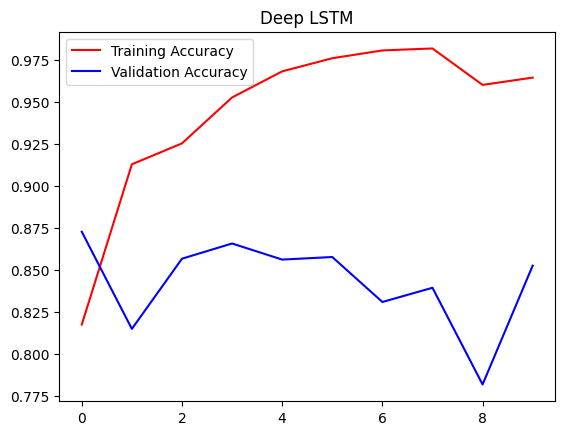

782/782 [==============================] - 34s 44ms/step - loss: 0.5793 - accuracy: 0.8525
Deep LSTM Accuracy: 85.25%


In [7]:
# Define and train Deep LSTM
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(10000, 32, input_length=max_review_length))
model_deep_lstm.add(LSTM(32, return_sequences=True))
model_deep_lstm.add(LSTM(32, return_sequences=True))
model_deep_lstm.add(LSTM(32))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_deep_lstm = model_deep_lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
plot_history(history_deep_lstm, "Deep LSTM")
scores_deep_lstm = model_deep_lstm.evaluate(x_test, y_test)

print("Deep LSTM Accuracy: %.2f%%" % (scores_deep_lstm[1] * 100))

## Висновок:

У результаті проведеного дослідження над рекурентними нейронними мережами на завданні класифікації рецензій з датасету IMDb можна зробити наступні висновки:

1. Проста рекурентна нейронна мережа (SimpleRNN) показала непогану точність на рівні 81.87%, але її результати були перевершені більш складними архітектурами.
2. Long Short-Term Memory (LSTM) виявився кращим за SimpleRNN, досягнувши точність на рівні 84.50%. LSTM має здатність добре працювати з послідовностями та враховувати довгострокові залежності, що зробило його ефективним в цьому завданні.
3. Модель Bidirectional LSTM показала ще кращі результати з точністю 85.12%. Вона використовує інформацію з обох напрямків послідовності, що робить її спроможною виявляти залежності в обох напрямках і покращувати результати класифікації.
4. Глибока LSTM (Deep LSTM) виявилася найефективнішою серед розглянутих моделей з точністю 85.25%. Додавання додаткових шарів LSTM дозволило збільшити точність, але потребувало більше обчислювальних ресурсів та часу.

Отже, результати показують, що використання більш складних архітектур рекурентних нейронних мереж, таких як LSTM та Bidirectional LSTM, може значно покращити точність класифікації текстів у порівнянні з простою рекурентною мережею. Глибокі LSTM можуть забезпечити ще кращі результати, але вимагають більших обчислювальних ресурсів.